In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [137]:
log_data=pd.read_csv('../Datas/log4.csv',header=None)

In [138]:
log_data

,0,1,2,3
0,roadkillstatus,1592058252564,2451238500,...
1,research2,1592058256043,46586900,...
2,busanmovie13,1592058256261,264503400,...
3,busanmovie5,1592058256666,29178500,...
4,busanmovie2,1592058256851,38638700,...
...,...,...,...,...
18795,TouristAtt,1592061570528,36693600,...
18796,ThemeTour_Subway,1592061570690,31064100,...
18797,research2,1592061570867,31363000,...
18798,research10,1592061571022,29779100,...


In [139]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [140]:
log_data.info

<bound method DataFrame.info of                 Dataset     Query Time  Execution Time ManagerId
0        roadkillstatus  1592058252564      2451238500       ...
1             research2  1592058256043        46586900       ...
2          busanmovie13  1592058256261       264503400       ...
3           busanmovie5  1592058256666        29178500       ...
4           busanmovie2  1592058256851        38638700       ...
...                 ...            ...             ...       ...
18795        TouristAtt  1592061570528        36693600       ...
18796  ThemeTour_Subway  1592061570690        31064100       ...
18797         research2  1592061570867        31363000       ...
18798        research10  1592061571022        29779100       ...
18799         research5  1592061571178        28255400       ...

[18800 rows x 4 columns]>

In [141]:
log_data.describe()

,Query Time,Execution Time
count,1.880000e+04,1.880000e+04
mean,1.592060e+12,3.596896e+07
std,9.601152e+05,4.605090e+07
min,1.592058e+12,1.802540e+07
25%,1.592059e+12,2.605915e+07
50%,1.592060e+12,2.866610e+07
75%,1.592061e+12,3.082942e+07
max,1.592062e+12,2.728199e+09


In [142]:
X=log_data[['Dataset','Query Time','Execution Time']]

In [143]:
X

,Dataset,Query Time,Execution Time
0,roadkillstatus,1592058252564,2451238500
1,research2,1592058256043,46586900
2,busanmovie13,1592058256261,264503400
3,busanmovie5,1592058256666,29178500
4,busanmovie2,1592058256851,38638700
...,...,...,...
18795,TouristAtt,1592061570528,36693600
18796,ThemeTour_Subway,1592061570690,31064100
18797,research2,1592061570867,31363000
18798,research10,1592061571022,29779100


In [144]:
X.describe()

,Query Time,Execution Time
count,1.880000e+04,1.880000e+04
mean,1.592060e+12,3.596896e+07
std,9.601152e+05,4.605090e+07
min,1.592058e+12,1.802540e+07
25%,1.592059e+12,2.605915e+07
50%,1.592060e+12,2.866610e+07
75%,1.592061e+12,3.082942e+07
max,1.592062e+12,2.728199e+09


In [145]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std

C:\Users\jhyun\Anaconda3\envs\MLDL\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [146]:
query_min=X[['Query Time']].min()
X[['Query Time']]=(X[['Query Time']]-query_min)

In [147]:
Dataset_Query=X.groupby('Dataset')['Query Time'].sum().to_frame().reset_index()

In [148]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [149]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [150]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [151]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std

In [152]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean) / query_std

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8C7B90348>,
      dtype=object)

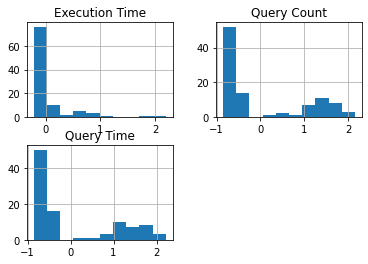

In [153]:
X.hist()

In [159]:
query_hot=set(X['Query Time'].sort_values(ascending=False).index[:30])

In [160]:
execution_hot=set(X['Execution Time'].sort_values(ascending=False).index[:30])

In [161]:
count_hot=set(X['Query Count'].sort_values(ascending=False).index[:30])

In [162]:
print(query_hot)
print(execution_hot)
print(count_hot)

{51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 65, 66, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98}
{2, 3, 4, 7, 9, 14, 20, 21, 26, 27, 28, 29, 30, 47, 49, 51, 52, 54, 56, 59, 60, 61, 62, 63, 64, 81, 82, 95, 97, 98}
{51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 65, 66, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98}


In [112]:
Hot_Dataset_Counts=round(len(X)*0.3)

In [163]:
hot_index=[]

# Query Time and Execution Time and Query Count
intersect=query_hot.intersection(execution_hot).intersection(count_hot)
hot_index=[data for data in intersect]

intersects=[]
#Query Time and Query Count
intersects.extend(query_hot.intersection(count_hot))
#Execution Time and Query Count
intersects.extend(execution_hot.intersection(count_hot))
#Query Time and Execution Time
intersects.extend(query_hot.intersection(execution_hot))
print(intersects)
while len(intersects)>0:
    if len(hot_index) >= Hot_Dataset_Counts:
        break
    data=intersects.pop(0)
    if data in hot_index:
        continue
    hot_index.append(data)
    
if len(hot_index) < Hot_Dataset_Counts:
    count_hot=set(X['Query Count'].sort_values(ascending=False).index[:30])
    index=0
    while len(hot_index) <Hot_Dataset_Counts:
        if count_hot[index] in hot_index:
            index+=1
            continue
        hot_index.append(count_hot[index])
                

[51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 65, 66, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 97, 98, 81, 82, 51, 52, 54, 56, 59, 60, 61, 62, 95, 97, 98, 81, 82, 51, 52, 54, 56, 59, 60, 61, 62, 95]


In [164]:
hot_index

[97,
 98,
 81,
 82,
 51,
 52,
 54,
 56,
 59,
 60,
 61,
 62,
 95,
 53,
 55,
 58,
 65,
 66,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 96]

In [165]:
len(hot_index)

30

In [166]:
Y=pd.DataFrame(np.zeros(99))

In [167]:
hots=list(hot_index)

In [168]:
Y.loc[hots]=1.0

In [169]:
Y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
94,1.0
95,1.0
96,1.0
97,1.0


In [170]:
X=X[["Query Time","Execution Time","Query Count"]]

In [171]:
X

,Query Time,Execution Time,Query Count
0,-0.741358,-0.176443,-0.749072
1,-0.601158,-0.101898,-0.584540
2,-0.581599,0.050872,-0.557118
3,-0.446495,2.196494,-0.420008
4,-0.458680,0.881970,-0.470282
...,...,...,...
94,1.310819,-0.168600,1.234449
95,1.746234,-0.055165,1.750896
96,1.717650,-0.160333,1.750896
97,1.194033,-0.015964,1.165894


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [173]:
tree=DecisionTreeClassifier()
model=tree.fit(X_train,y_train)

In [174]:
X_test

,Query Time,Execution Time,Query Count
62,1.681641,0.016680,1.677771
40,-0.803976,-0.100956,-0.808486
95,1.746234,-0.055165,1.750896
18,-0.816106,-0.199653,-0.817626
97,1.194033,-0.015964,1.165894
84,0.916433,-0.175833,1.019644
64,-0.452000,0.245170,-0.456571
42,-0.585962,-0.105257,-0.589110
10,-0.521603,-0.171287,-0.520555
0,-0.741358,-0.176443,-0.749072


In [175]:
predict=model.predict(X_test)

In [176]:
print("Accuracy: %.2f" % (accuracy_score(y_test, predict) * 100), "%") # 정확도 % 계산

Accuracy: 100.00 %
